In [153]:
# The libraries used in processing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [154]:
# The dataframe is read from the csv file - healthcare-dataset-stroke-data.csv - taken from kaggle
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [155]:
# The first 5 instances of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [156]:
#df.value_counts()

### Find the number of NULL values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<AxesSubplot:>

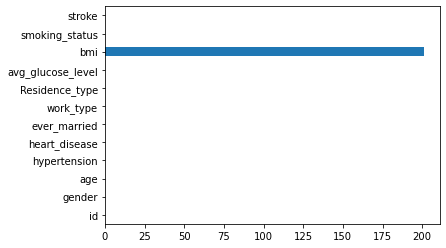

In [157]:
# Printing the number of N/A values in eacg column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

* Found 201 NULL values in bmi column

In [158]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [159]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## PRE PROCESSING + EDA

In [160]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
df = df.drop(['id'],axis=1)


### Gender analysis

In [161]:
# Checking the values in the gender column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

* We have a 'other' gender and since there is only 1 instance we will remove it as to reduce the dimension of age

<AxesSubplot:ylabel='gender'>

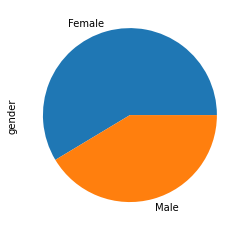

In [162]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

* There are more females as compared to males 

## Target feature - Stroke

* Stroke analysis

In [163]:
# Value count in the stroke attribute
df['stroke'].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

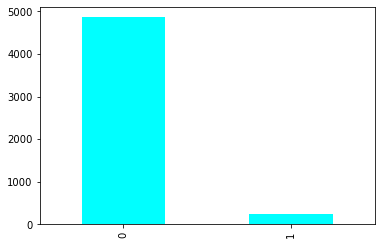

In [164]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [165]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


* Our dataset is highly skewed since only around 5% of the instances got stroke 
* We will be needing to perform necessary transformations to improve samples of minority class 

### Hyper-tension Analysis

<AxesSubplot:>

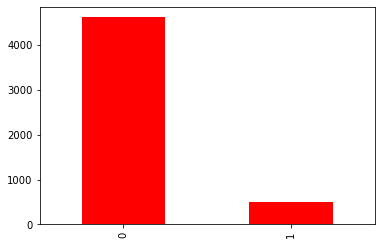

In [166]:
# Graphical representation of the value counts of the hypertension attribute
df['hypertension'].value_counts().plot(kind="bar",color = "red")

### Work type Analysis

In [167]:
# Value of count of work-type attribute
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:ylabel='work_type'>

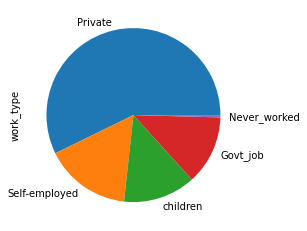

In [168]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

### Smoking status Analysis

In [169]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:ylabel='smoking_status'>

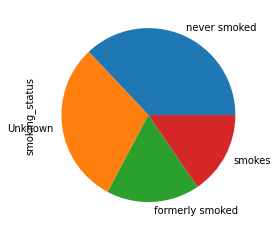

In [170]:
# Graphical representation of the value counts of the smoking staus attribute
df['smoking_status'].value_counts().plot(kind="pie")

### Residence type Analysis

In [171]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:ylabel='Residence_type'>

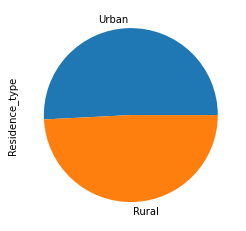

In [172]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

* We have an equal percentage of population who are from Urban and rural areas

### BMI analysis

In [173]:
# Number of BMI - NULL values
df['bmi'].isnull().sum()

201

* We only have N/A values in bmi column - 201 Null values

<AxesSubplot:xlabel='bmi', ylabel='Count'>

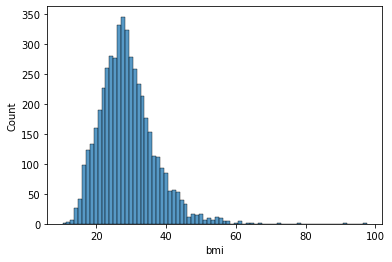

In [174]:
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

* Bmi is rightly skewed

<AxesSubplot:>

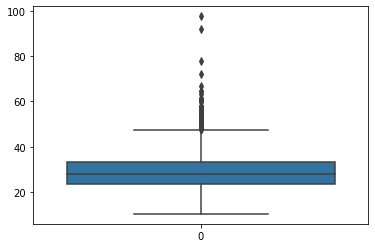

In [175]:
sns.boxplot(data=df['bmi'])

* Based on the histogram and boxplot we see that there are many outliers in bmi 

In [176]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    5000
True      110
Name: bmi, dtype: int64

* Total outliers in bmi:110
* Total non-outliers in bmi:5000

In [177]:
# Percentage of NULL values in bmi
df['bmi'].isna().sum()/len(df['bmi'])*100

3.9334637964774952

* NULL values hold 3.93 % of the instances in the dataframe

In [178]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [179]:
# Percentage of instances who got stroke
df['stroke'].sum()/len(df)*100

4.87279843444227

* Our main target function is stroke And the instances who got a stroke is in the minority - 249  Which is only 4.9 % of the instances

In [180]:
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())


Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


* Among the 201 bmi NULL values 40 values in them got stroke 
* Thus we cant drop NULL values 

* Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
* Hence we impute it with median values


In [181]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


### AGE analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

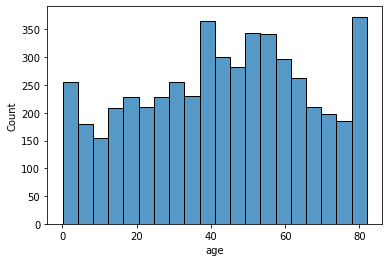

In [182]:
# Graphical representation fo the data in age column
# histogram
sns.histplot(data=df['age'])

<AxesSubplot:>

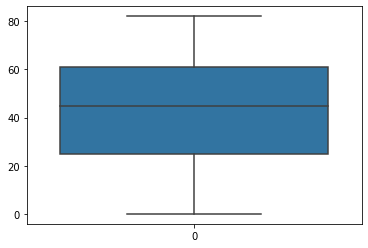

In [183]:
# boxplot
sns.boxplot(data=df['age'])

* The age parameter values does not have any outliers
* And has a normal distribution

### AVERAGE GLUCOSE LEVEL ANALYSIS

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

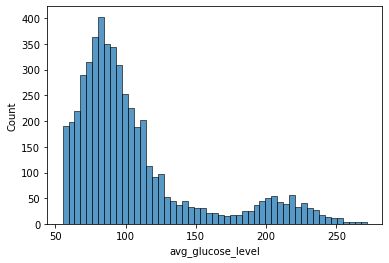

In [184]:
# Graphical representation fo the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])

<AxesSubplot:>

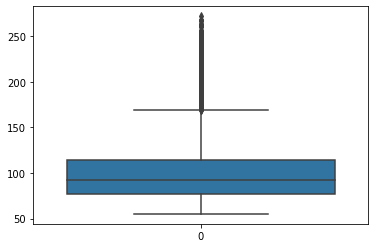

In [185]:
# Boxplot
sns.boxplot(data=df['avg_glucose_level'])

* There are many outliers present based on the boxplot and histogram 
* The data is positively skewed 

In [186]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    4483
True      627
Name: avg_glucose_level, dtype: int64

* Total outliers in avg_glucose_level : 627
* Total non-outliers in avg_glucose_level : 4483

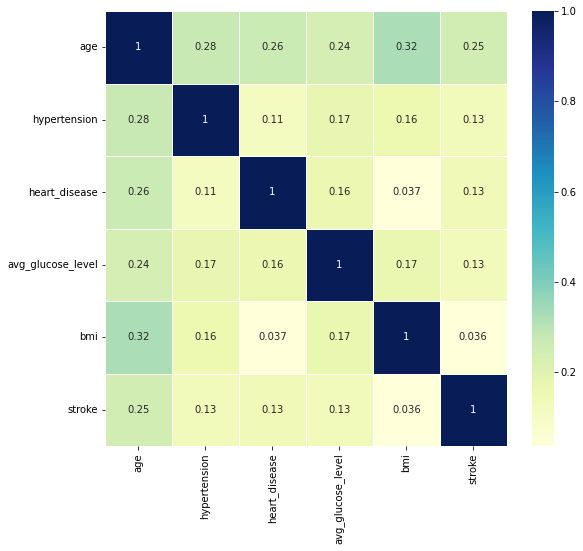

In [187]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
#Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

#Compute correlation matrix
corrmat = numeric_df.corr()

#Plot heatmap
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidth=0.8, annot=True)
plt.show()


* There is  a weak correlation between the attributes as per the plotted heatmap
* The highest correlation found was between age and bmi - 0.32
* Rest all correlations were less than 0.32
* We could not drw any statistical insight from heatmap

### Heart_disease analysis 

In [188]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

* This data reflects that around 94.5 % of the total population or list of people are free from Heart_disease and only 6.5 % are having heart_disease.

<AxesSubplot:ylabel='heart_disease'>

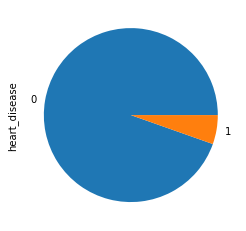

In [189]:
df['heart_disease'].value_counts().plot(kind="pie")

### Ever_married analysis with Values

In [190]:
# Value count of evver married attribute
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

* This result shows that 65.6 % of people from the list are married and 34.4 % are unmarried.

<AxesSubplot:ylabel='ever_married'>

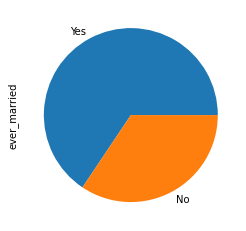

In [191]:
# Graphical representation
df['ever_married'].value_counts().plot(kind="pie")

## Cross analysis - all the attribute compared with target attibute

<AxesSubplot:xlabel='stroke', ylabel='count'>

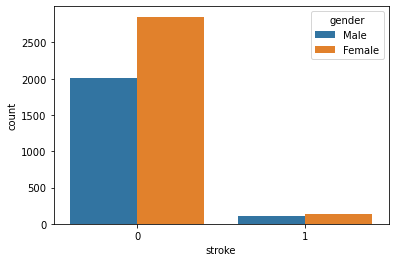

In [192]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

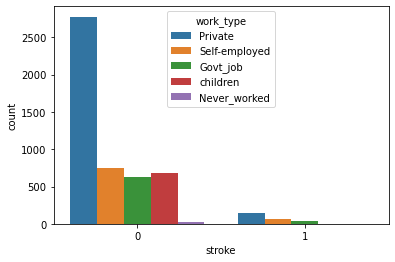

In [193]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<AxesSubplot:xlabel='stroke', ylabel='count'>

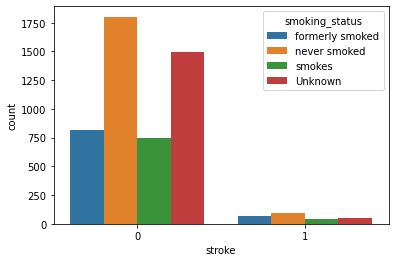

In [194]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

* Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<AxesSubplot:xlabel='stroke', ylabel='count'>

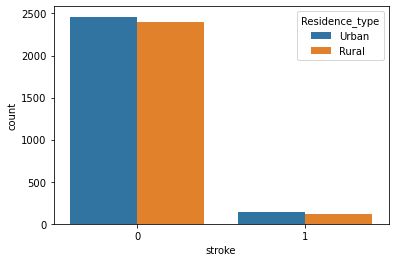

In [195]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

* Based on the analysis the people who live in Urban areas were reported with more strokes

<AxesSubplot:xlabel='stroke', ylabel='count'>

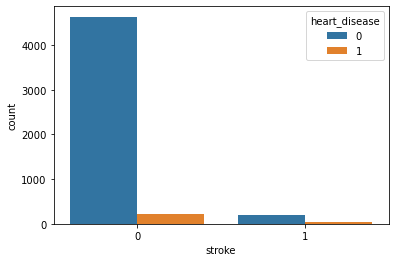

In [196]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

* This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

<AxesSubplot:xlabel='stroke', ylabel='count'>

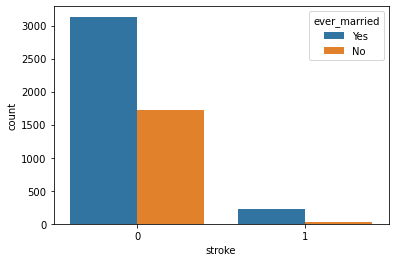

In [197]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

* This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes". 
* This shows most of the Married people got Strokes compared to Unmarried people.

### Creating dummy variables for numeric-binary attributes

In [198]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)


In [199]:
# The data frame after performing dummy attributes
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,202.21,28.1,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1


In [200]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library 
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [201]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

* Scaling the numeric values for bringing them all to the same scale

### Creating test-train split (80-20 split)

In [202]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [203]:
# Checking the size of the splits 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 15)
y_train: (7777,)
X_test: (1945, 15)
y_test: (1945,)


## Training Model

### Decision Tree

In [204]:
#importing the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics 
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train,y_train)

#predicting result using the test dataset
y_pred_clf = clf.predict(X_test)
y_pred_prob_clf = clf.predict_proba(X_test)[:, 1]

# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))


Accuracy: 0.9784061696658097


In [205]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_clf))
print("Precision_score:",precision_score(y_test,y_pred_clf))
print("Recall_score:",recall_score(y_test,y_pred_clf))
print("f1_score:",f1_score(y_test,y_pred_clf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_clf))

Accuracy_score: 0.9784061696658097
Precision_score: 0.958498023715415
Recall_score: 1.0
f1_score: 0.9788092835519677
ROC AUC Score: 0.9784615384615384


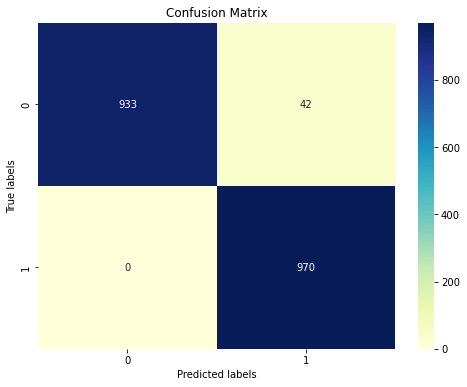

In [206]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'xgb' is your trained XGBoost classifier
# Assuming 'X_test' and 'y_test' are your test features and labels

# Predict on test set
y_pred_clf = clf.predict(X_test)

# Compute confusion matrix
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_clf, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### KNN

In [207]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.9722365038560411
ROC AUC Score: 0.9723076923076923


In [208]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_knn))
print("Precision_score:",precision_score(y_test,y_pred_knn))
print("Recall_score:",recall_score(y_test,y_pred_knn))
print("f1_score:",f1_score(y_test,y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy_score: 0.9722365038560411
Precision_score: 0.947265625
Recall_score: 1.0
f1_score: 0.9729187562688064
ROC AUC Score: 0.9723076923076923


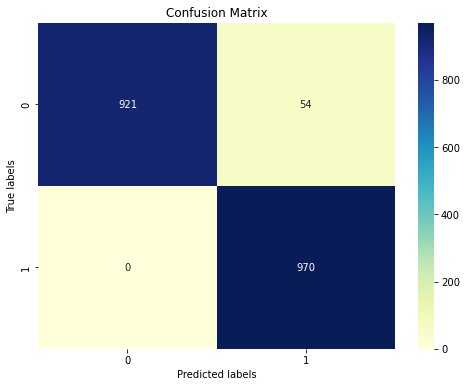

In [209]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'xgb' is your trained XGBoost classifier
# Assuming 'X_test' and 'y_test' are your test features and labels

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### XGBoost

In [210]:
#importing the XGBoost Classifier module
from xgboost  import XGBClassifier

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))



Accuracy: 0.9789203084832905
ROC AUC Score: 0.998314565159926


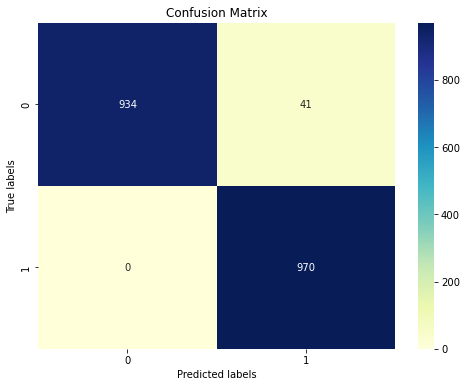

In [211]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'xgb' is your trained XGBoost classifier
# Assuming 'X_test' and 'y_test' are your test features and labels

# Predict on test set
y_pred_xgb = xgb.predict(X_test)

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [212]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

Accuracy_score: 0.9789203084832905
Precision_score: 0.9594460929772503
Recall_score: 1.0
f1_score: 0.9793033821302373
ROC AUC Score: 0.998314565159926


### Random Forest

In [213]:

# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))



Accuracy: 0.9953727506426735


In [214]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_rf))
print("Precision_score:",precision_score(y_test,y_pred_rf))
print("Recall_score:",recall_score(y_test,y_pred_rf))
print("f1_score:",f1_score(y_test,y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

Accuracy_score: 0.9953727506426735
Precision_score: 0.9908069458631257
Recall_score: 1.0
f1_score: 0.995382247306311
ROC AUC Score: 1.0


In [215]:
# Importing module for kfold cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold

# Performing k fold cross validation using 20 splits
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X_over, y_over, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  99.29033471070886
[0.99178645 0.98767967 0.99588477 0.99794239 0.98559671 0.99588477
 0.99382716 0.98765432 0.99588477 0.99382716 0.99176955 0.99794239
 0.98559671 0.99588477 0.99176955 0.98971193 0.99382716 0.99794239
 0.99382716 0.99382716]


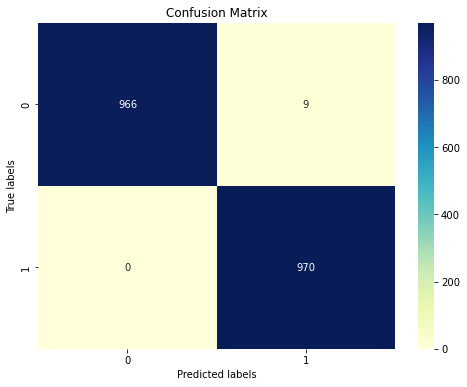

In [216]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rf_clf' is your trained random forest classifier
# Assuming 'X_test' and 'y_test' are your test features and labels

# Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Logistic regression

In [217]:

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred_lr = classifier.predict(X_test)
y_pred_prob_lr = classifier.predict_proba(X_test)[:, 1]

confusion_matrix(y_test, y_pred_lr)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

Accuracy: 0.7645244215938304


c:\Users\kanak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [218]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_lr))
print("Precision_score:",precision_score(y_test,y_pred_lr))
print("Recall_score:",recall_score(y_test,y_pred_lr))
print("f1_score:",f1_score(y_test,y_pred_lr))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_lr))

Accuracy_score: 0.7645244215938304
Precision_score: 0.7442748091603053
Recall_score: 0.8041237113402062
f1_score: 0.7730426164519326
ROC AUC Score: 0.8341760507533704


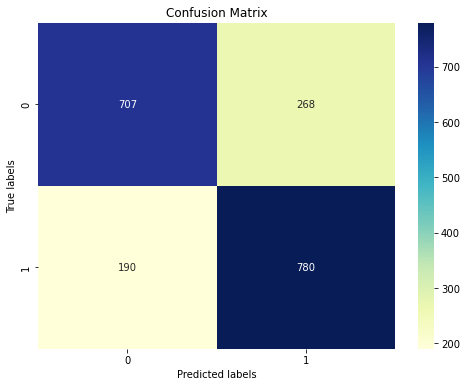

In [219]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'xgb' is your trained XGBoost classifier
# Assuming 'X_test' and 'y_test' are your test features and labels

# Predict on test set
y_pred_lr = classifier.predict(X_test)

# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


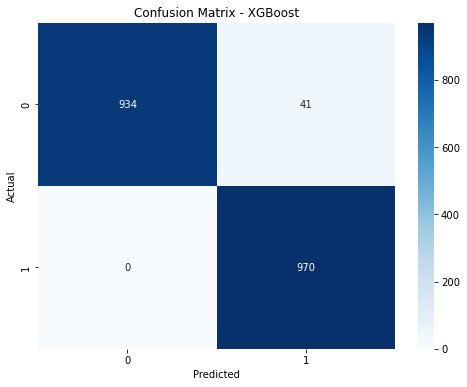

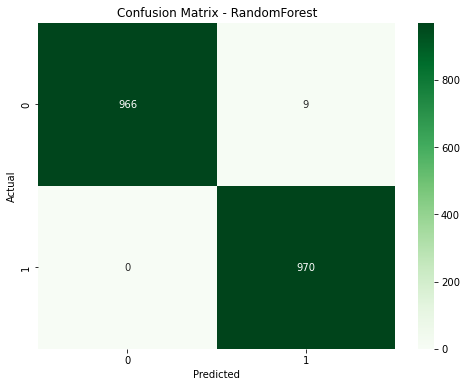

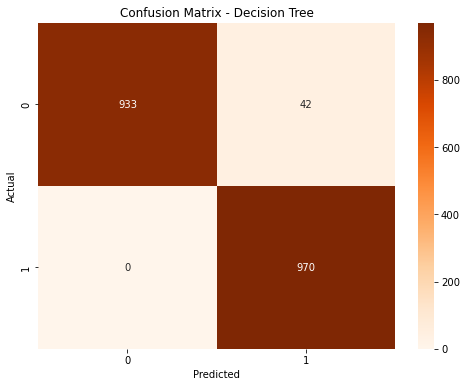

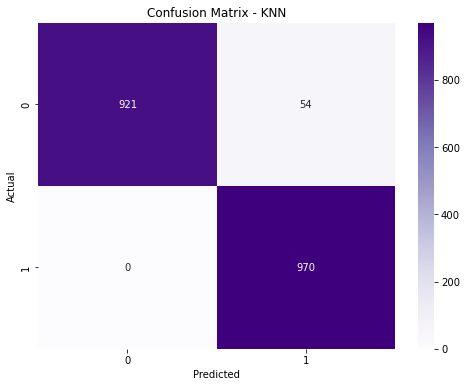

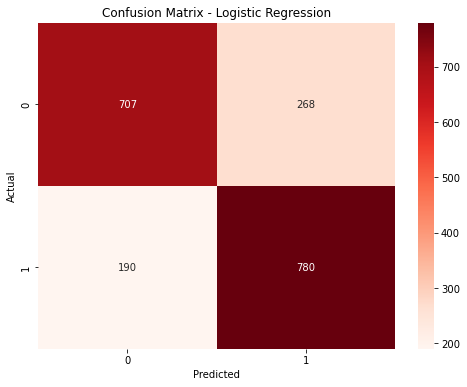

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming all predictions and true labels are already defined
# y_pred, y_pred_rf, y_pred_dt, y_pred_knn, y_pred_lr
# y_test is the true labels for all

# XGBoost Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# RandomForest Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - RandomForest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


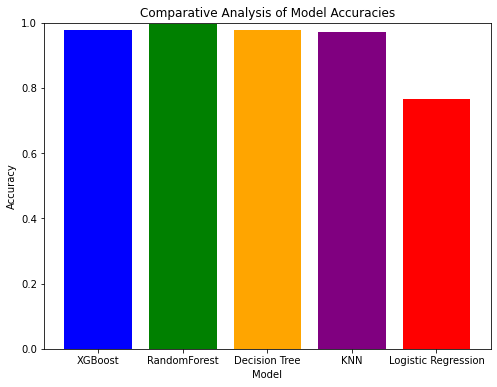

In [227]:
import matplotlib.pyplot as plt

# Assuming you have already computed the accuracies as follows:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)  # XGBoost accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # RandomForest accuracy
accuracy_dt = accuracy_score(y_test, y_pred_clf)  # Decision Tree accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)  # KNN accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)  # Logistic Regression accuracy

# Storing the accuracies in a dictionary for easy plotting
model_accuracies = {
    'XGBoost': accuracy_xgb,
    'RandomForest': accuracy_rf,
    'Decision Tree': accuracy_dt,
    'KNN': accuracy_knn,
    'Logistic Regression': accuracy_lr
}

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title('Comparative Analysis of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensures the y-axis starts at 0 and goes up to 1
plt.show()


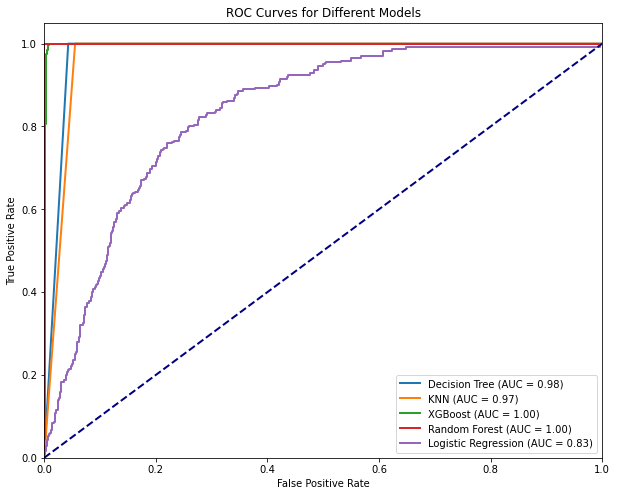

In [229]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example data
models = {
    'Decision Tree': {'y_true': y_test, 'y_pred_prob': y_pred_prob_clf},
    'KNN': {'y_true': y_test, 'y_pred_prob': y_pred_prob_knn},
    'XGBoost': {'y_true': y_test, 'y_pred_prob': y_pred_prob_xgb},
    'Random Forest': {'y_true': y_test, 'y_pred_prob': y_pred_prob_rf},
    'Logistic Regression': {'y_true': y_test, 'y_pred_prob': y_pred_prob_lr},
}

plt.figure(figsize=(10, 8))

for model_name, data in models.items():
    fpr, tpr, _ = roc_curve(data['y_true'], data['y_pred_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()


In [228]:
import pandas as pd

# Assuming you have already computed the accuracies as follows:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)  # XGBoost accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # RandomForest accuracy
accuracy_dt = accuracy_score(y_test, y_pred_clf)  # Decision Tree accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)  # KNN accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)  # Logistic Regression accuracy

# Creating a dictionary to store the model names and their accuracies
data = {
    'Model': ['XGBoost', 'RandomForest', 'Decision Tree', 'KNN', 'Logistic Regression'],
    'Accuracy': [accuracy_xgb, accuracy_rf, accuracy_dt, accuracy_knn, accuracy_lr]
}

# Creating a DataFrame to display the data in a table
accuracy_table = pd.DataFrame(data)

# Displaying the table
print(accuracy_table)


                 Model  Accuracy
0              XGBoost  0.978920
1         RandomForest  0.995373
2        Decision Tree  0.978406
3                  KNN  0.972237
4  Logistic Regression  0.764524


In [223]:
# Making sample predictions based on manual value entry
age=75
avg_glucose_level=300
bmi=36.6
gender_Male=1
ever_married_Yes=1	
work_type_Never_worked=0	
work_type_Private=1	
work_type_Self_employed=0
work_type_children=0	
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=1
heart_disease_1=1
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)


1


In [224]:
# For the front end 
import pickle

with open('model.pickle','wb') as f:
  pickle.dump(rf_clf,f)